In [1]:
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as pdr
import yfinance as yfin

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

yfin.pdr_override()

/home/vadim/miniconda3/envs/DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ticker_name = '^GSPC'

In [3]:
test_df = pdr.get_data_yahoo(ticker_name, start='2022-11-16', end='2023-01-04')

[*********************100%***********************]  1 of 1 completed


In [4]:
ticker = pdr.get_data_yahoo(ticker_name, start='2021-08-01', end='2022-11-15')

[*********************100%***********************]  1 of 1 completed


In [5]:
ticker

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,4406.859863,4422.180176,4384.810059,4387.160156,4387.160156,3724090000
2021-08-03,4392.740234,4423.790039,4373.000000,4423.149902,4423.149902,3965190000
2021-08-04,4415.950195,4416.169922,4400.229980,4402.660156,4402.660156,4260760000
2021-08-05,4408.859863,4429.759766,4408.859863,4429.100098,4429.100098,3769410000
2021-08-06,4429.069824,4440.819824,4429.069824,4436.520020,4436.520020,3451870000
...,...,...,...,...,...,...
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,3828.110107,4607640000
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,3748.570068,4645010000
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,3956.370117,5781260000


In [6]:
df = ticker[['Close']].copy()

In [7]:
df.reset_index(inplace=True)

In [8]:
df.rename({'Date': 'ds', 'Close': 'y'}, axis=1, inplace=True)

In [9]:
df

,ds,y
0,2021-08-02,4387.160156
1,2021-08-03,4423.149902
2,2021-08-04,4402.660156
3,2021-08-05,4429.100098
4,2021-08-06,4436.520020
...,...,...
321,2022-11-08,3828.110107
322,2022-11-09,3748.570068
323,2022-11-10,3956.370117
324,2022-11-11,3992.929932


In [10]:
m = Prophet(changepoint_range=1, changepoint_prior_scale=0.25, weekly_seasonality=False)
m.fit(df)

17:31:44 - cmdstanpy - INFO - Chain [1] start processing
17:31:44 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
days=45

In [12]:
future = m.make_future_dataframe(periods=days)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

In [13]:
forecast = m.predict(future)

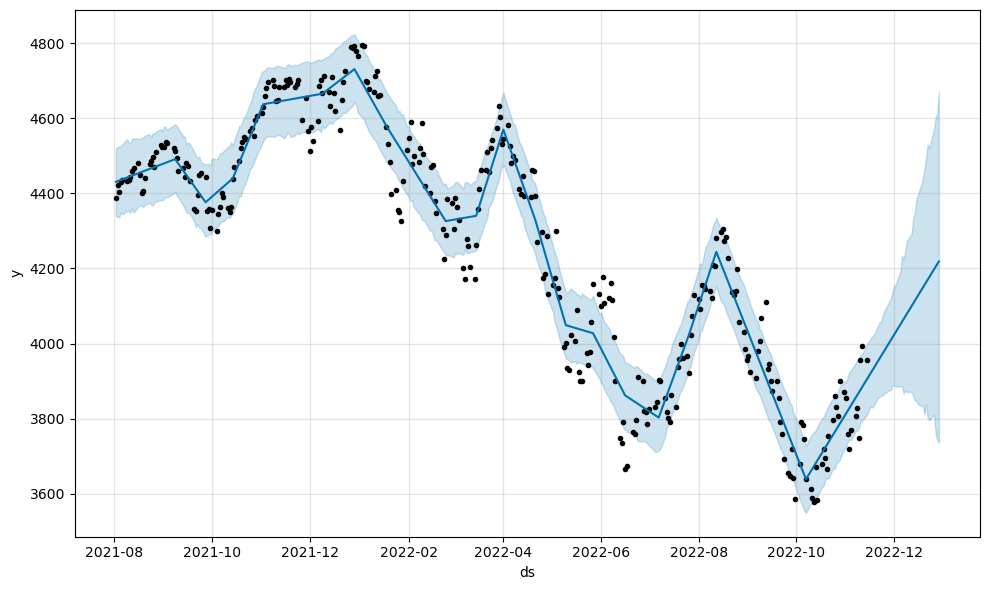

In [14]:
fig1 = m.plot(forecast)

In [15]:
fig1.axes[0].plot(test_df.index, test_df[['Close']], color='g')

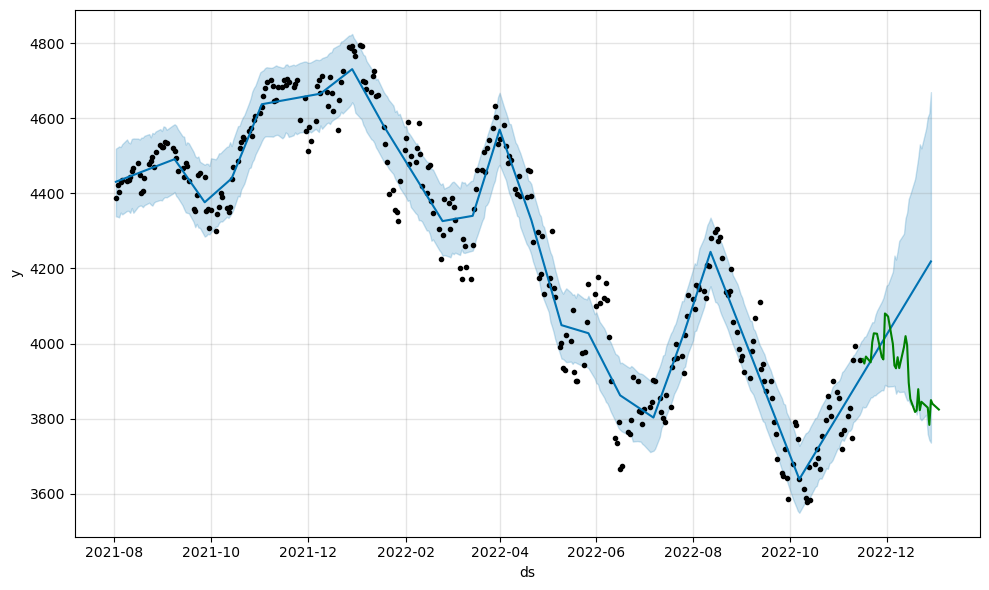

In [16]:
fig1

In [17]:
print('MAPE', mean_absolute_percentage_error(test_df['Close'], forecast[forecast['ds'] >= '2022-11-16']['yhat']))
print('MAE', mean_absolute_error(test_df['Close'], forecast[forecast['ds'] >= '2022-11-16']['yhat']))


MAPE 0.042239958478016884
MAE 163.48678081205296
